In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [4]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [5]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


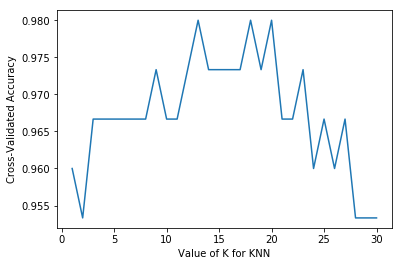

In [6]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# More efficient parameter tuning using GridSearchCV

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# define the parameter values that should be searched
# Here we defind the k values that we will like to evaluate
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [11]:
# create a parameter grid: map the parameter name(s) to the list of values for which it should be evaluated
# Here the name is 'n_neighbors' and the list of possible values of it are in 'k_range'.
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [12]:
# instantiate the grid
''' the grid has the same parameters as cross_validation except that it does not include
either the features or target values but it includes param_grid. 

'''
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [13]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [14]:
# view the results as a pandas DataFrame
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

mean_test_score  std_test_score               params
0          0.960000        0.053333   {'n_neighbors': 1}
1          0.953333        0.052068   {'n_neighbors': 2}
2          0.966667        0.044721   {'n_neighbors': 3}
3          0.966667        0.044721   {'n_neighbors': 4}
4          0.966667        0.044721   {'n_neighbors': 5}
5          0.966667        0.044721   {'n_neighbors': 6}
6          0.966667        0.044721   {'n_neighbors': 7}
7          0.966667        0.044721   {'n_neighbors': 8}
8          0.973333        0.032660   {'n_neighbors': 9}
9          0.966667        0.044721  {'n_neighbors': 10}
10         0.966667        0.044721  {'n_neighbors': 11}
11         0.973333        0.032660  {'n_neighbors': 12}
12         0.980000        0.030551  {'n_neighbors': 13}
13         0.973333        0.044222  {'n_neighbors': 14}
14         0.973333        0.032660  {'n_neighbors': 15}
15         0.973333        0.032660  {'n_neighbors': 16}
16         0.973333        0.032660  {'n_neighbors': 17}
17         0.980000        0.030551  {'n_neighbors': 18}
18         0.973333        0.032660  {'n_neighbors': 19}
19         0.980000        0.030551  {'n_neighbors': 20}
20         0.966667        0.033333  {'n_neighbors': 21}
21         0.966667        0.033333  {'n_neighbors': 22}
22         0.973333        0.032660  {'n_neighbors': 23}
23         0.960000        0.044222  {'n_neighbors': 24}
24         0.966667        0.033333  {'n_neighbors': 25}
25         0.960000        0.044222  {'n_neighbors': 26}
26         0.966667        0.044721  {'n_neighbors': 27}
27         0.953333        0.042687  {'n_neighbors': 28}
28         0.953333        0.042687  {'n_neighbors': 29}
29         0.953333        0.042687  {'n_neighbors': 30}

In [18]:
# examine the first result
print(grid.cv_results_['params'][0])

print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [16]:
# print the array of mean scores only
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[ 0.96        0.95333333  0.96666667  0.96666667  0.96666667  0.96666667
  0.96666667  0.96666667  0.97333333  0.96666667  0.96666667  0.97333333
  0.98        0.97333333  0.97333333  0.97333333  0.97333333  0.98
  0.97333333  0.98        0.96666667  0.96666667  0.97333333  0.96
  0.96666667  0.96        0.96666667  0.95333333  0.95333333  0.95333333]


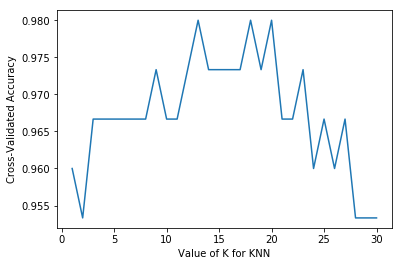

In [17]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [ ]:
# How does one get the model with the best score?
# There is a function by which you can call the best model by asking for the best score amongst all the scores produced.
# grid.best_score_ gives the best score obtained by the grid search.
# grid.best_params_ gives
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)